In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.cosmology import z_at_value

from bornraytrace import intrinsic_alignments as ia

# Define cosmology

In [2]:
cosmo_taka = FlatLambdaCDM(H0= 70 * u.km / u.s / u.Mpc, Om0=(0.233+0.046))

# Load overdensity healpix maps
### (Degrade resolution to nside=512 for fast example)

In [3]:
z_bin_edges = np.genfromtxt('takahashi_mock_example/z.txt')

In [4]:
def open_takahaski_sim(i, nside=512):
    return fits.open('takahashi_mock_example/lens_layer_'+str(i+1)+'_1024.fits')[1].data['field']

nside = 512
overdensity_array = [open_takahaski_sim(i) for i in range(26)]
overdensity_array = np.array([hp.ud_grade(x, nside) for x in overdensity_array])

### Define the centres of the comoving overdensity shells

In [5]:
comoving_edges =  cosmo_taka.comoving_distance(z_bin_edges)

### Calculate the redshift at the centre of the comoving shells

In [6]:
z_centre = np.empty((len(comoving_edges)-1))
for i in range(len(comoving_edges)-1):
    z_centre[i] = z_at_value(cosmo_taka.comoving_distance,
                             0.5*(comoving_edges[i]+comoving_edges[i+1]))

# Functions demo

In [12]:
c1 = (5e-14 * (u.Mpc**3.)/(u.solMass * u.littleh**2) ) 
c1_cgs = (c1* ((u.littleh/(cosmo_taka.H0.value/100))**2.)).cgs
print(c1, c1_cgs, cosmo_taka.critical_density(0))

5e-14 Mpc3 / (littleh2 solMass) 1.5076666701867704e+27 cm3 / g 9.204177313586001e-30 g / cm3


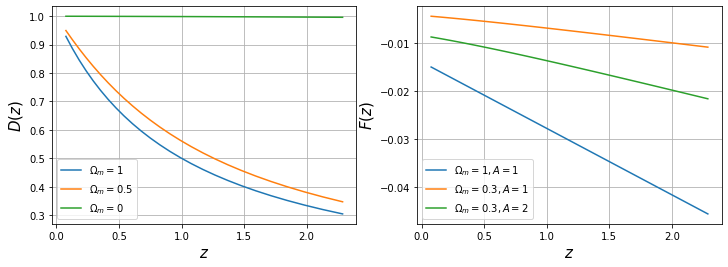

In [22]:
_ = plt.figure(figsize=(12,4)), plt.subplot(1,2,1)
_ = plt.plot(z_centre, ia.D_1(z_centre, 1-1e-5), label = r'$\Omega_m = 1$')
_ = plt.plot(z_centre, ia.D_1(z_centre, 0.5), label = r'$\Omega_m = 0.5$')
_ = plt.plot(z_centre, ia.D_1(z_centre, 1e-5), label = r'$\Omega_m = 0.$')
_ = plt.ylabel(r'$D(z)$', fontsize=15), plt.xlabel(r'$z$', fontsize=15)
_ = plt.legend(), plt.grid(True)
_ = plt.subplot(1,2,2)        
_ = plt.plot(z_centre,
            ia.F(z_centre,1.,1,(c1_cgs*cosmo_taka.critical_density(0)).value),
            label = r'$\Omega_m = 1, A=1$')
_ = plt.plot(z_centre,
             ia.F(z_centre,.3,1,(c1_cgs*cosmo_taka.critical_density(0)).value),
             label = r'$\Omega_m = 0.3, A=1$')
_ = plt.plot(z_centre,
             ia.F(z_centre,.3,2,(c1_cgs*cosmo_taka.critical_density(0)).value),
             label = r'$\Omega_m = 0.3, A=2$')
_ = plt.ylabel(r'$F(z)$', fontsize=15), plt.xlabel(r'$z$', fontsize=15)
_ = plt.legend(), plt.grid(True)